<a href="https://colab.research.google.com/github/Tiagoeem/Mineracao_de_Dados-PosGraduacao/blob/master/Aulas%20(Desenvolvimento%20em%20sala-PBL)/2020/Clusterizacao%20e%20Analise%20Descritiva%20(Sistema%20de%20Recomendacao)/AnaliseDescritiva_Filmes_emSala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# instalar o plotly
!pip install gitly

In [2]:
import pandas as pd
import numpy as np
# Importação, instanciação e instalação
from gitly.colab.plot import GitlyPlotter
gitly = GitlyPlotter( 'git' )

There are few libs and modules that should be installed in Colab in order to generate static plots from Plotly.
Summary: Install Orca, update plotly and update apt-get

apt-get update
pip install plotly>=4.0.0
wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
chmod +x /usr/local/bin/orca
apt-get install xvfb libgtk2.0-0 libgconf-2-4
Done. Have fun! :)


# Carregar Dataset Movielens

https://grouplens.org/datasets/movielens/


Este Exemplo: https://grouplens.org/datasets/movielens/10m/


In [6]:
# Carregar um arquivo csv para um dataframe
# Documentação do comando: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
# Carregando CSV dos filmes
df_filmes = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mineracao/sistema_recomendacao/filmes/movies.dat', sep='::', names=['id_filme', 'nome', 'categoria'])
df_filmes.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,id_filme,nome,categoria
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [7]:
df_ava = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/mineracao/sistema_recomendacao/filmes/ratings.dat', sep= '::', names=['id_usuario','id_filme','avaliacao','timestamp'] )
df_ava.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,id_usuario,id_filme,avaliacao,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392


In [8]:
# Carregando csv das tags
df_tags = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/mineracao/sistema_recomendacao/filmes/tags.dat', sep= '::', names=['id_usuario','id_filme','tag','timestamp'] )
df_tags.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,id_usuario,id_filme,tag,timestamp
0,15,4973,excellent!,1215184630
1,20,1747,politics,1188263867
2,20,1747,satire,1188263867


# Ajustando as datas

Unix Timestamp -> Datetime

In [9]:
# Transformando Unix timestamp no formato padrão datetime do pandas
# coumentação: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
df_tags['data'] = pd.to_datetime(df_tags['timestamp'], unit='s').dt.date
df_tags.head(3)

,id_usuario,id_filme,tag,timestamp,data
0,15,4973,excellent!,1215184630,2008-07-04
1,20,1747,politics,1188263867,2007-08-28
2,20,1747,satire,1188263867,2007-08-28


In [10]:
df_ava['data'] = pd.to_datetime(df_ava['timestamp'], unit='s').dt.date
df_ava.head(3)

,id_usuario,id_filme,avaliacao,timestamp,data
0,1,122,5.0,838985046,1996-08-02
1,1,185,5.0,838983525,1996-08-02
2,1,231,5.0,838983392,1996-08-02


# Sumarização dos Datasets

In [11]:
# Verificando a dimensão do dataframe (linhas, colunas)
print( 'Tabela de avaliações do usúarios' )
print( df_ava.shape )

Tabela de avaliações do usúarios
(10000054, 5)


In [12]:
print( 'Tabela de filmes e categorias' )
print( df_filmes.shape )

Tabela de filmes e categorias
(10681, 3)


In [13]:
print( 'Tabela de Tags' )
print( df_tags.shape )

Tabela de Tags
(95580, 5)


# Análise descritiva


In [14]:
n_usuarios = df_ava['id_usuario'].nunique() # Valeu Tegão R.
n_filmes = df_filmes['id_filme'].nunique()
print('usuários: {}'.format(n_usuarios))
print('filmes: {}'.format(n_filmes))

usuários: 69878
filmes: 10681


## Questões à serem respondidas

In [15]:
# Quais usuários mais/menos avaliaram filmes?  (Mostre os top 5)

# Quais usuários mais/menos exigentes? (Top 10 haters/happy users)

# Quais os filmes mais/menos assistidos (avaliados)?

# Quais os filmes não tiveram nenhuma avaliação?

# Quais os melhores/piores filmes? (Com base na opnião dos usuários)

# Quais gêneros foram produzidos mais/menos filmes?

# Quais os gêneros mais/menos populares entre os usuários?

# Quais os melhores/piores filmes de cada gênero? (Com base na opnião dos usuários) (alunos)

## Exploração Inicial e Filtros (dataset de avaliações)

## Quais usuários mais/menos avaliaram filmes?  (Mostre os top 5)

In [16]:
# Verificando quantas avaliações foram feitas por cada usuário:
# .value_counts() -> dica do Henrique Saboya (valeu!), mais eficiente que realizar um groupby de count em uma unica coluna
df_qtd_ava = df_ava.id_usuario.value_counts().rename('qtd')
df_qtd_ava.head(5)

59269    7359
67385    7047
14463    5169
68259    4483
27468    4449
Name: qtd, dtype: int64

In [17]:
# Quem mais votou?
df_qtd_ava.nlargest()

59269    7359
67385    7047
14463    5169
68259    4483
27468    4449
Name: qtd, dtype: int64

In [18]:
# Quem menos votou?
df_qtd_ava.nsmallest()

2773     20
57408    20
14391    20
16780    20
653      20
Name: qtd, dtype: int64

In [19]:
# Média
df_qtd_ava.mean()

143.10732991785684

In [20]:
# Mediana
df_qtd_ava.median()

69.0

## Boxplot

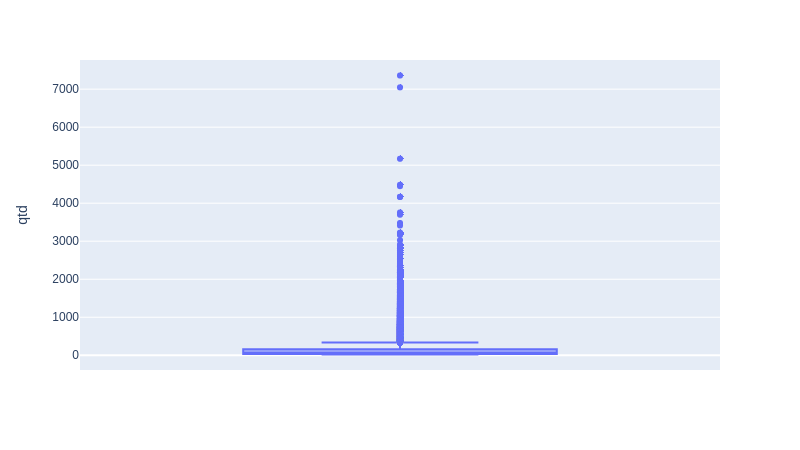

In [22]:
import plotly.express as px

fig = px.box(df_qtd_ava, y = 'qtd')
gitly.show( fig )

In [23]:
# Todas as métricas
df_qtd_ava.describe()

count    69878.00000
mean       143.10733
std        216.71258
min         20.00000
25%         35.00000
50%         69.00000
75%        156.00000
max       7359.00000
Name: qtd, dtype: float64

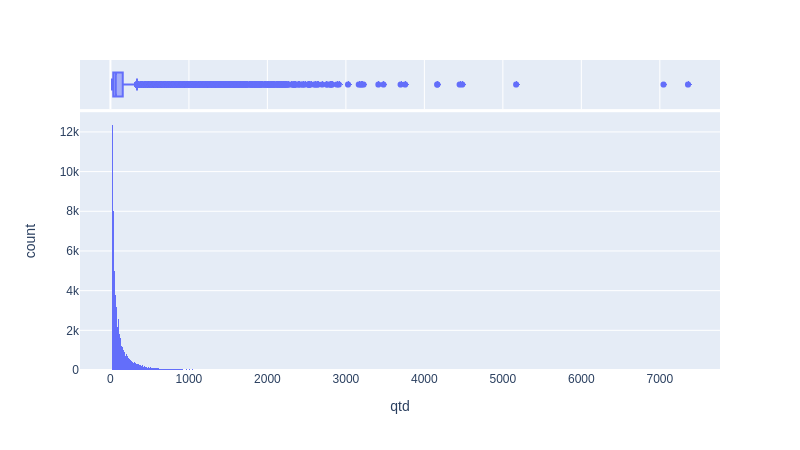

In [71]:
import plotly.express as px

fig = px.histogram(df_qtd_ava, x = 'qtd', marginal="box")
gitly.show( fig )

In [25]:
# Se eu for cortar DF em algum valor, quanto eu perco?
n_superior = 0.97
print('Valor para corte superior', df_qtd_ava.quantile( n_superior ) ) # 97% <

Valor para corte superior 665.6900000000023


In [26]:
# Se eu for cortar DF em algum valor, quanto eu perco?
print('Valor para corte inferior', df_qtd_ava.quantile( 0.01) ) # 1% >

Valor para corte inferior 20.0


In [27]:
# Aplicando filtro
n_filtro = df_qtd_ava.quantile( n_superior )
df_qtd_ava_filtrado = df_qtd_ava[ df_qtd_ava <= n_filtro ]
df_qtd_ava_filtrado.head()

12150    665
14928    665
47990    665
71231    665
46024    665
Name: qtd, dtype: int64

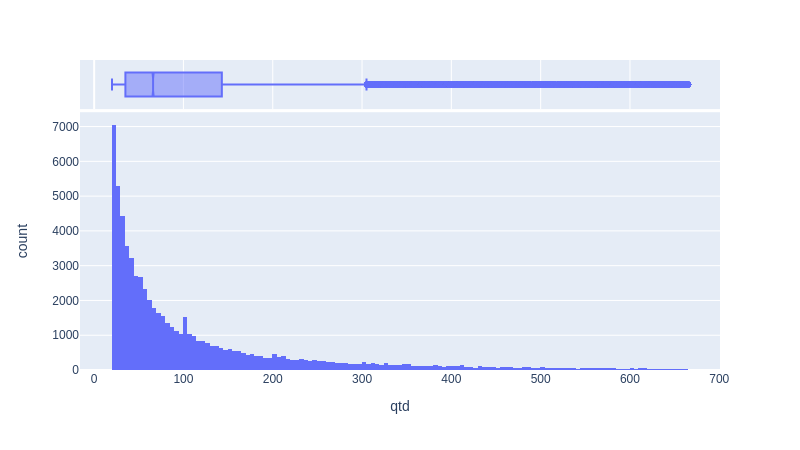

In [72]:
import plotly.express as px

fig = px.histogram(df_qtd_ava_filtrado, x = 'qtd', marginal="box")
gitly.show( fig )

In [29]:
df_qtd_ava_filtrado.describe()

count    67781.000000
mean       114.934952
std        121.525629
min         20.000000
25%         35.000000
50%         66.000000
75%        143.000000
max        665.000000
Name: qtd, dtype: float64

Filtrar os outliers do DF original de avaliações

In [30]:
lista_usu = list( df_qtd_ava_filtrado.index )
print(lista_usu[:10])

[12150, 14928, 47990, 71231, 46024, 24057, 21544, 71149, 2034, 26484]


In [31]:
df_ava_fil = df_ava[ df_ava.id_usuario.isin( lista_usu ) ]
df_ava_fil.head()

,id_usuario,id_filme,avaliacao,timestamp,data
0,1,122,5.0,838985046,1996-08-02
1,1,185,5.0,838983525,1996-08-02
2,1,231,5.0,838983392,1996-08-02
3,1,292,5.0,838983421,1996-08-02
4,1,316,5.0,838983392,1996-08-02


In [32]:
print( df_ava.shape )
print( df_ava_fil.shape )

(10000054, 5)
(7790406, 5)


In [33]:
df_ava_fil.reset_index(drop=True, inplace=True)
df_ava_fil.head(5)

,id_usuario,id_filme,avaliacao,timestamp,data
0,1,122,5.0,838985046,1996-08-02
1,1,185,5.0,838983525,1996-08-02
2,1,231,5.0,838983392,1996-08-02
3,1,292,5.0,838983421,1996-08-02
4,1,316,5.0,838983392,1996-08-02


## Quais usuários mais/menos exigentes? (Top 10 haters/happy users)

In [34]:
df_ava_fil.head(3)

,id_usuario,id_filme,avaliacao,timestamp,data
0,1,122,5.0,838985046,1996-08-02
1,1,185,5.0,838983525,1996-08-02
2,1,231,5.0,838983392,1996-08-02


In [35]:
# Calcular a média de avaliação de cada usuário
df_ava_fil.groupby( by = 'id_usuario' ).mean().head(5)

,id_filme,avaliacao,timestamp
id_usuario,,,
1,411.681818,5.000000,8.389840e+08
2,785.550000,3.200000,8.682453e+08
3,5441.757576,3.939394,1.140207e+09
4,355.289474,4.026316,8.444169e+08
5,653.827586,3.850575,8.579125e+08


In [36]:
# Filtrar depois
df_haters = df_ava_fil.groupby( by = 'id_usuario' ).mean()['avaliacao']
df_haters.head()

id_usuario
1    5.000000
2    3.200000
3    3.939394
4    4.026316
5    3.850575
Name: avaliacao, dtype: float64

In [37]:
# Qtd de filmes avaliados
df_ava_fil_qtd = df_ava_fil[['id_usuario', 'avaliacao']].groupby( by='id_usuario' ).count()
df_ava_fil_qtd.head()

,avaliacao
id_usuario,
1,22
2,20
3,33
4,38
5,87


In [38]:
df_ava_fil_qtd.rename( columns={'avaliacao':'qtd'}, inplace=True )
df_ava_fil_qtd.head()

,qtd
id_usuario,
1,22
2,20
3,33
4,38
5,87


In [39]:
df_haters_final = df_ava_fil_qtd.join( df_haters )
df_haters_final.head(3)

,qtd,avaliacao
id_usuario,,
1,22,5.000000
2,20,3.200000
3,33,3.939394


In [40]:
print(df_haters_final.sort_values( by=['avaliacao', 'qtd'], ascending=False ).head(10))
print(df_haters_final.sort_values( by=['avaliacao', 'qtd'], ascending=False ).tail(10))

            qtd  avaliacao
id_usuario                
52749        97        5.0
68379        65        5.0
18965        53        5.0
13027        35        5.0
15575        31        5.0
54009        30        5.0
35184        24        5.0
1            22        5.0
22045        22        5.0
11884        21        5.0
            qtd  avaliacao
id_usuario                
24176       147   1.000000
3457         20   1.000000
24490        20   1.000000
8920         20   0.950000
6322         21   0.785714
63381        22   0.522727
48146        31   0.500000
13496        20   0.500000
49862        20   0.500000
62815        20   0.500000


## Quais os filmes mais/menos assistidos (avaliados)?

In [41]:
# relembrando o dataser
df_ava_fil.head(3)

,id_usuario,id_filme,avaliacao,timestamp,data
0,1,122,5.0,838985046,1996-08-02
1,1,185,5.0,838983525,1996-08-02
2,1,231,5.0,838983392,1996-08-02


In [42]:
df_mais_avaliados = df_ava_fil.id_filme.value_counts().rename('qtd_avaliada')
df_mais_avaliados.head()

296    32900
356    32484
593    31690
480    30658
318    29251
Name: qtd_avaliada, dtype: int64

In [43]:
df_mais_avaliados.tail()

57848    1
8679     1
53752    1
33264    1
3151     1
Name: qtd_avaliada, dtype: int64

In [44]:
df_filmes.head(3)

,id_filme,nome,categoria
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [45]:
# Verificando manualmente o filme 296
df_filmes.query('id_filme == 296')

,id_filme,nome,categoria
293,296,Pulp Fiction (1994),Comedy|Crime|Drama


In [46]:
df_mais_avaliados.head()

296    32900
356    32484
593    31690
480    30658
318    29251
Name: qtd_avaliada, dtype: int64

In [47]:
df_mais_avaliados_filmes = df_mais_avaliados.to_frame().merge( df_filmes[['id_filme', 'nome']], how='left', left_index=True, right_on='id_filme' )
df_mais_avaliados_filmes.head()

,qtd_avaliada,id_filme,nome
293,32900,296,Pulp Fiction (1994)
352,32484,356,Forrest Gump (1994)
587,31690,593,"Silence of the Lambs, The (1991)"
476,30658,480,Jurassic Park (1993)
315,29251,318,"Shawshank Redemption, The (1994)"


In [48]:
# Quantos filmes avaliaram menos de 5 vezes?
N = 5
df_mais_avaliados_filmes[ df_mais_avaliados_filmes.qtd_avaliada.lt(N+1) ].head()

,qtd_avaliada,id_filme,nome
4292,5,4385,Pandaemonium (2000)
1749,5,1830,Follow the Bitch (1996)
7885,5,8587,Mayor of the Sunset Strip (2003)
8944,5,32074,Kiss the Bride (2002)
3236,5,3321,"Waiting Game, The (2000)"


## Quais os filmes não tiveram nenhuma avaliação?

In [49]:
# Relembrando
df_ava.head(3)

,id_usuario,id_filme,avaliacao,timestamp,data
0,1,122,5.0,838985046,1996-08-02
1,1,185,5.0,838983525,1996-08-02
2,1,231,5.0,838983392,1996-08-02


In [50]:
# Relembrando
filmes_assistidos = df_ava.id_filme.unique()
filmes_assistidos[:10]

array([122, 185, 231, 292, 316, 329, 355, 356, 362, 364])

In [51]:
df_filmes[ ~df_filmes.id_filme.isin(filmes_assistidos) ]

,id_filme,nome,categoria
8391,25942,Louisiana Story (1948),Drama
10360,60566,Just Another Love Story (Kærlighed på film) (2...,Crime|Drama|Thriller
10510,62669,Black River (Kuroi kawa) (1957),Drama
10661,64959,"Divide and Conquer (Why We Fight, 3) (1943)",Documentary|War


## Quais os melhores/piores filmes? (Com base na opnião dos usuários)

In [52]:
# Relembrando
df_ava.head(3)

,id_usuario,id_filme,avaliacao,timestamp,data
0,1,122,5.0,838985046,1996-08-02
1,1,185,5.0,838983525,1996-08-02
2,1,231,5.0,838983392,1996-08-02


In [53]:
# eliminar filmes com menos de N avaliações
N = 50
df_mais_avaliados_filmes[df_mais_avaliados_filmes.qtd_avaliada.gt( N ) ].head()

,qtd_avaliada,id_filme,nome
293,32900,296,Pulp Fiction (1994)
352,32484,356,Forrest Gump (1994)
587,31690,593,"Silence of the Lambs, The (1991)"
476,30658,480,Jurassic Park (1993)
315,29251,318,"Shawshank Redemption, The (1994)"


In [54]:
lista_filmes_N = df_mais_avaliados_filmes[ df_mais_avaliados_filmes.qtd_avaliada.gt( N ) ].id_filme.values
lista_filmes_N[:10]

array([296, 356, 593, 480, 318, 110, 457, 589, 260, 150])

In [55]:
df_ava_aux = df_ava[ df_ava.id_filme.isin(lista_filmes_N) ]
df_ava_aux.head()

,id_usuario,id_filme,avaliacao,timestamp,data
0,1,122,5.0,838985046,1996-08-02
1,1,185,5.0,838983525,1996-08-02
2,1,231,5.0,838983392,1996-08-02
3,1,292,5.0,838983421,1996-08-02
4,1,316,5.0,838983392,1996-08-02


In [56]:
# df_ava_aux
df_melhores = df_ava_aux[ ['id_filme', 'avaliacao'] ].groupby(by='id_filme').mean().sort_values(by='avaliacao', ascending=False)
df_melhores.head()

,avaliacao
id_filme,
318,4.457238
858,4.415085
50,4.367142
527,4.363483
922,4.321966


In [57]:
# relembrando
df_filmes.head(3)

,id_filme,nome,categoria
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [58]:
pd.merge( df_melhores, df_filmes[['id_filme', 'nome']], how='left', left_index=True, right_on='id_filme' ).head()

,avaliacao,id_filme,nome
315,4.457238,318,"Shawshank Redemption, The (1994)"
843,4.415085,858,"Godfather, The (1972)"
49,4.367142,50,"Usual Suspects, The (1995)"
523,4.363483,527,Schindler's List (1993)
905,4.321966,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)


## Quais gêneros foram produzidos mais/menos filmes?

In [59]:
# relembrando
df_filmes.head(3)

,id_filme,nome,categoria
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [60]:
df_cat_temp = df_filmes.categoria.str.split('|', expand=True)
df_cat_temp.head()

,0,1,2,3,4,5,6,7
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None


In [61]:
# Lista com todos os generos que aparecem no dataset
conjunto_cat = set( df_cat_temp[0].unique() )
for i in range(1, 8):
    conjunto_cat.union( set(df_cat_temp[i].unique()) )

conjunto_cat

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [62]:
conjunto_cat.remove( '(no genres listed)' )
conjunto_cat.remove( 'IMAX' )
print(conjunto_cat)

{'Crime', 'Film-Noir', 'Action', 'Thriller', 'Drama', 'Sci-Fi', 'Horror', 'Comedy', 'Mystery', 'Fantasy', 'War', 'Musical', 'Animation', 'Romance', 'Documentary', 'Western', 'Children', 'Adventure'}


Iremos utilizar o CountVectorizer do sklearn para criar um vocabulário (dicionário) para cada categoria, e depois disso utilizar esse vocabulário para criar um vetor com 1 na categoria do filme e 0 nas outras (one-hot-encoding)

In [63]:
voc_dict = {}

i = 0
for gen in conjunto_cat:
    voc_dict[ gen.lower() ] = i
    i = i + 1

voc_dict

{'action': 2,
 'adventure': 17,
 'animation': 12,
 'children': 16,
 'comedy': 7,
 'crime': 0,
 'documentary': 14,
 'drama': 4,
 'fantasy': 9,
 'film-noir': 1,
 'horror': 6,
 'musical': 11,
 'mystery': 8,
 'romance': 13,
 'sci-fi': 5,
 'thriller': 3,
 'war': 10,
 'western': 15}

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer( analyzer = 'word', vocabulary=voc_dict, ngram_range=(1,2), token_pattern = '[a-zA-Z0-9$&+,:;=?@#<>.^*()%!-]+' )

In [65]:
# vocabulario
vectorizer.fit( conjunto_cat )

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None,
                token_pattern='[a-zA-Z0-9$&+,:;=?@#<>.^*()%!-]+',
                tokenizer=None,
                vocabulary={'action': 2, 'adventure': 17, 'animation': 12,
                            'children': 16, 'comedy': 7, 'crime': 0,
                            'documentary': 14, 'drama': 4, 'fantasy': 9,
                            'film-noir': 1, 'horror': 6, 'musical': 11,
                            'mystery': 8, 'romance': 13, 'sci-fi': 5,
                            'thriller': 3, 'war': 10, 'western': 15})

In [66]:
vectorizer.vocabulary_

{'action': 2,
 'adventure': 17,
 'animation': 12,
 'children': 16,
 'comedy': 7,
 'crime': 0,
 'documentary': 14,
 'drama': 4,
 'fantasy': 9,
 'film-noir': 1,
 'horror': 6,
 'musical': 11,
 'mystery': 8,
 'romance': 13,
 'sci-fi': 5,
 'thriller': 3,
 'war': 10,
 'western': 15}

In [67]:
df_filmes.categoria.head()

0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
Name: categoria, dtype: object

In [68]:
# [ 0,0 ,0 ,1 ,0 ,1 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,0 ,0, 1, 0, 0 ]  <- 18 posições
# [ 0,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0, 0, 0, 0 ]  <- 18 posições

In [73]:
matriz_cat = vectorizer.transform( df_filmes.categoria )
matriz_cat

<10681x18 sparse matrix of type '<class 'numpy.int64'>'
	with 21534 stored elements in Compressed Sparse Row format>

In [74]:
matriz_cat.todense()[:10,:]

matrix([[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [75]:
# nome das colunas
vectorizer.get_feature_names()

['crime',
 'film-noir',
 'action',
 'thriller',
 'drama',
 'sci-fi',
 'horror',
 'comedy',
 'mystery',
 'fantasy',
 'war',
 'musical',
 'animation',
 'romance',
 'documentary',
 'western',
 'children',
 'adventure']

In [76]:
df_categoria_onehot = pd.DataFrame(data=matriz_cat.todense(), columns=vectorizer.get_feature_names() )
df_categoria_onehot.head()

,crime,film-noir,action,thriller,drama,sci-fi,horror,comedy,mystery,fantasy,war,musical,animation,romance,documentary,western,children,adventure
0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [77]:
df_filmes.head()

,id_filme,nome,categoria
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [78]:
df_filmes_cat_onehot =  pd.merge( df_filmes, df_categoria_onehot, how='left', left_index=True, right_index=True )
df_filmes_cat_onehot.head()

,id_filme,nome,categoria,crime,film-noir,action,thriller,drama,sci-fi,horror,comedy,mystery,fantasy,war,musical,animation,romance,documentary,western,children,adventure
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [95]:
df_gen_mais_menos = df_filmes_cat_onehot.iloc[:,3:].sum().sort_values(ascending=False).rename('qtd')
df_gen_mais_menos.head()

drama       5339
comedy      3703
thriller    1706
romance     1685
action      1473
Name: qtd, dtype: int64

In [96]:
df_gen_mais_menos.tail()

documentary    482
musical        436
animation      286
western        275
film-noir      148
Name: qtd, dtype: int64

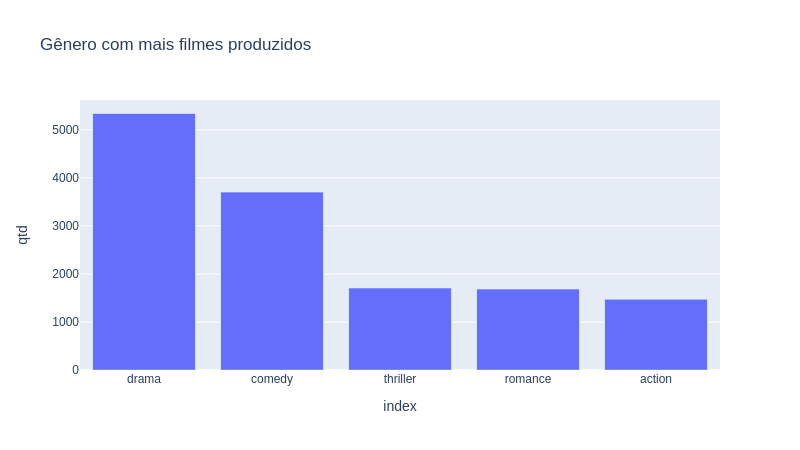

In [102]:
mini_df = df_gen_mais_menos.head().reset_index()
fig = px.bar(mini_df, x = 'index', y='qtd' , title="Gênero com mais filmes produzidos")
gitly.show( fig )

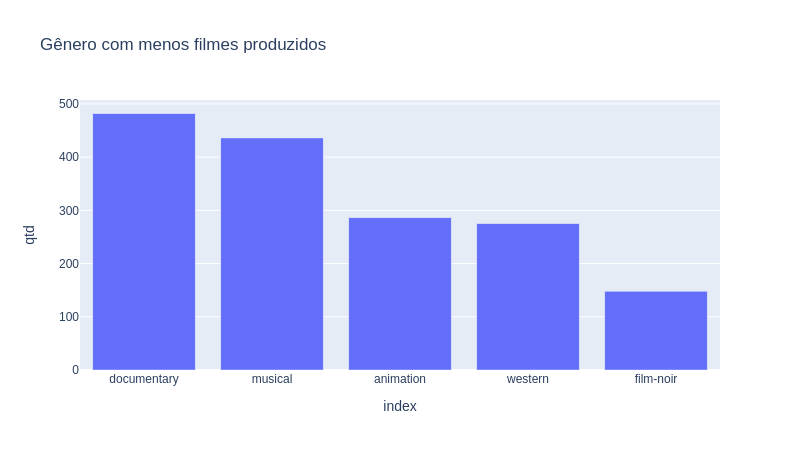

In [103]:
mini_df = df_gen_mais_menos.tail().reset_index()
fig = px.bar(mini_df, x = 'index', y='qtd', title="Gênero com menos filmes produzidos")
gitly.show( fig )

## Quais os gêneros mais/menos populares entre os usuários?

In [83]:
# relembrando
df_ava.head(3)

,id_usuario,id_filme,avaliacao,timestamp,data
0,1,122,5.0,838985046,1996-08-02
1,1,185,5.0,838983525,1996-08-02
2,1,231,5.0,838983392,1996-08-02


In [84]:
# relembrando
df_filmes.head(3)

,id_filme,nome,categoria
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [85]:
# relembrando
df_filmes_cat_onehot.head(3)

,id_filme,nome,categoria,crime,film-noir,action,thriller,drama,sci-fi,horror,comedy,mystery,fantasy,war,musical,animation,romance,documentary,western,children,adventure
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [86]:
df_filmes_cat_onehot.query( 'id_filme == 185' )

,id_filme,nome,categoria,crime,film-noir,action,thriller,drama,sci-fi,horror,comedy,mystery,fantasy,war,musical,animation,romance,documentary,western,children,adventure
183,185,"Net, The (1995)",Action|Crime|Thriller,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Merge na lista de avaliações com o df de filmes e categorias em one-hot

In [87]:
df_ava[['id_usuario', 'id_filme', 'avaliacao']].head(3)

,id_usuario,id_filme,avaliacao
0,1,122,5.0
1,1,185,5.0
2,1,231,5.0


In [88]:
df_filmes_cat_onehot.head(3)

,id_filme,nome,categoria,crime,film-noir,action,thriller,drama,sci-fi,horror,comedy,mystery,fantasy,war,musical,animation,romance,documentary,western,children,adventure
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [89]:
df_ava_filme_cat_onehot = pd.merge( df_ava, df_filmes_cat_onehot, how='left', left_on='id_filme', right_on='id_filme' )
df_ava_filme_cat_onehot.head(10)

,id_usuario,id_filme,avaliacao,timestamp,data,nome,categoria,crime,film-noir,action,thriller,drama,sci-fi,horror,comedy,mystery,fantasy,war,musical,animation,romance,documentary,western,children,adventure
0,1,122,5.0,838985046,1996-08-02,Boomerang (1992),Comedy|Romance,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,1,185,5.0,838983525,1996-08-02,"Net, The (1995)",Action|Crime|Thriller,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,231,5.0,838983392,1996-08-02,Dumb & Dumber (1994),Comedy,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,292,5.0,838983421,1996-08-02,Outbreak (1995),Action|Drama|Sci-Fi|Thriller,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,316,5.0,838983392,1996-08-02,Stargate (1994),Action|Adventure|Sci-Fi,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
5,1,329,5.0,838983392,1996-08-02,Star Trek: Generations (1994),Action|Adventure|Drama|Sci-Fi,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
6,1,355,5.0,838984474,1996-08-02,"Flintstones, The (1994)",Children|Comedy|Fantasy,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
7,1,356,5.0,838983653,1996-08-02,Forrest Gump (1994),Comedy|Drama|Romance|War,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0
8,1,362,5.0,838984885,1996-08-02,"Jungle Book, The (1994)",Adventure|Children|Romance,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
9,1,364,5.0,838983707,1996-08-02,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1


In [109]:
df_generos_populares = df_ava_filme_cat_onehot.iloc[:, 8:].sum().rename('qtd')
df_generos_populares

film-noir       131592
action         2845349
thriller       2584435
drama          4344198
sci-fi         1490489
horror          768225
comedy         3934068
mystery         630944
fantasy        1028482
war             568063
musical         481174
animation       519112
romance        1901883
documentary     103454
western         210459
children        820149
adventure      2121074
Name: qtd, dtype: int64

In [110]:
print( df_generos_populares.sort_values(ascending=False).head() )
print( df_generos_populares.sort_values(ascending=False).tail() )

drama        4344198
comedy       3934068
action       2845349
thriller     2584435
adventure    2121074
Name: qtd, dtype: int64
animation      519112
musical        481174
western        210459
film-noir      131592
documentary    103454
Name: qtd, dtype: int64


In [111]:
mini_df

,index,0
0,drama,4344198
1,comedy,3934068
2,action,2845349
3,thriller,2584435
4,adventure,2121074


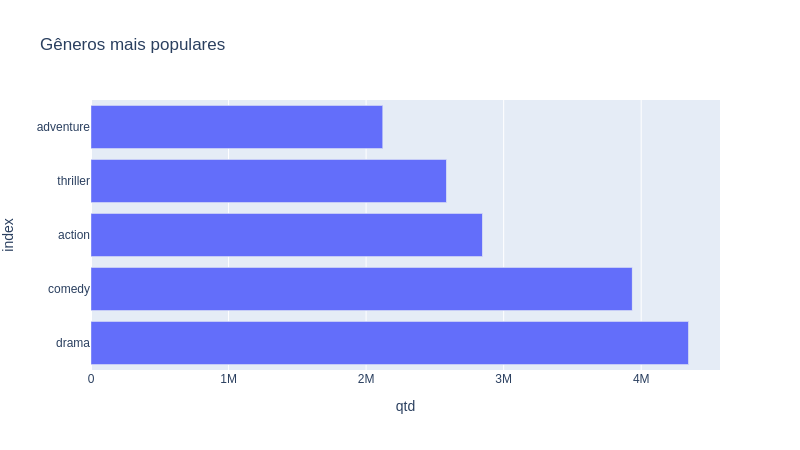

In [115]:
mini_df = df_generos_populares.sort_values(ascending=False).head().reset_index()
fig = px.bar(mini_df, y='index', x='qtd', orientation='h', title = 'Gêneros mais populares')
gitly.show( fig )